In [3]:
#importing libraries

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [19]:
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [5]:
#Extracting the Data

In [6]:
d = pd.read_csv('Brain.csv')

In [7]:
#exploring DataSet

In [8]:
d.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [10]:
d.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [12]:
#Analyzing Data

In [13]:
#Data Visualization

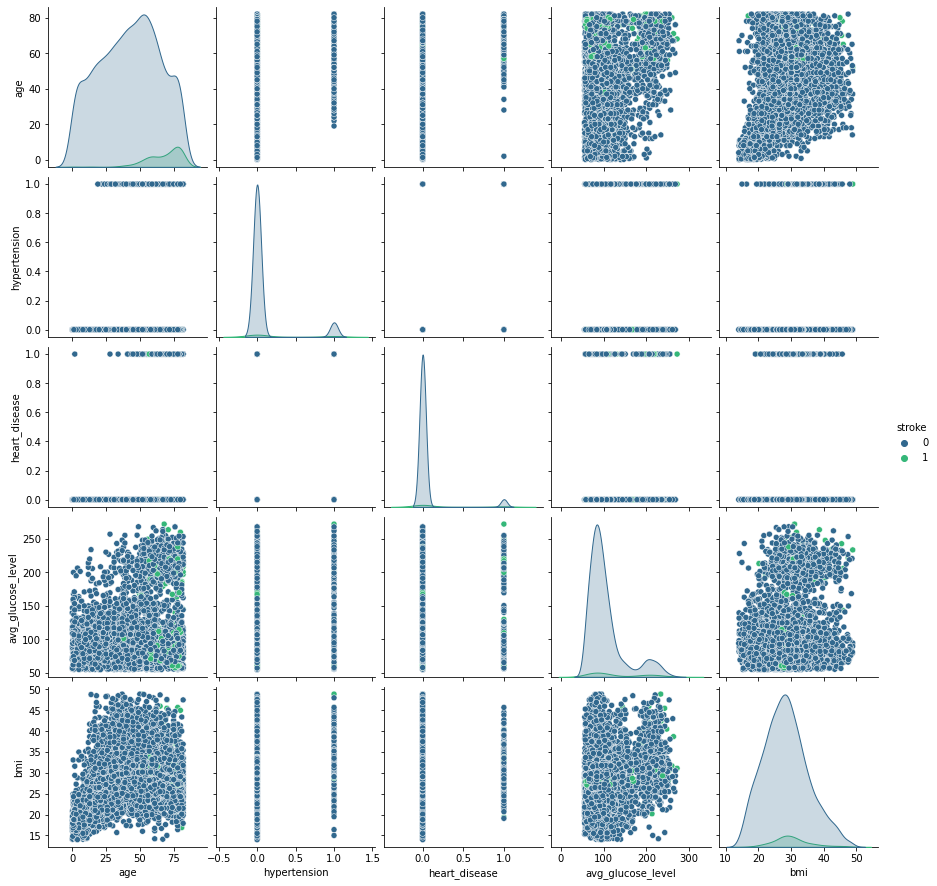

In [20]:
sns.pairplot(data=d,kind='scatter',palette='viridis',hue='stroke')

<AxesSubplot:xlabel='age', ylabel='Count'>

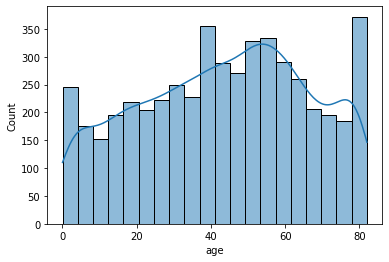

In [38]:
sns.histplot(d['age'],palette='viridis',kde='True')

Text(0.5, 1.0, 'Work Type')

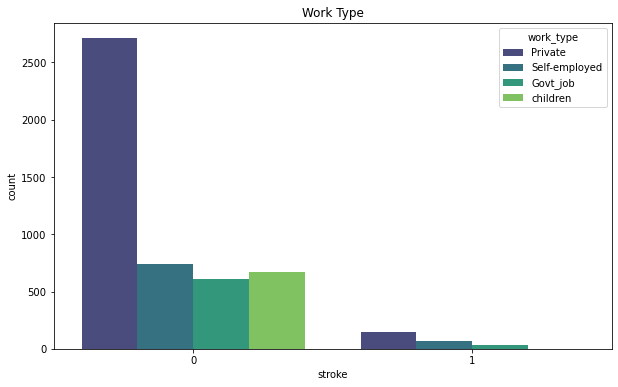

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x='stroke',data=d,palette='viridis',hue='work_type')
plt.title('Work Type')

Text(0.5, 1.0, 'Marital Status')

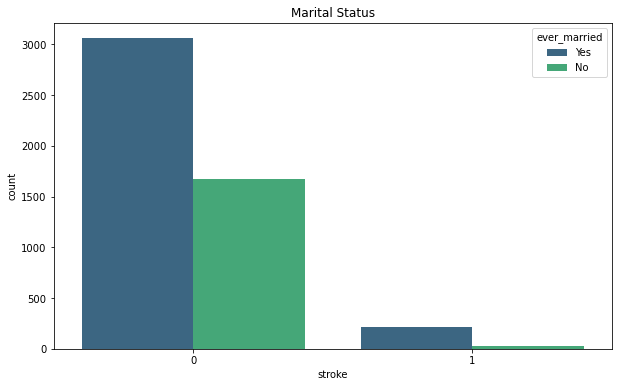

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x='stroke',data=d,palette='viridis',hue='ever_married')
plt.title('Marital Status')

Text(0.5, 1.0, 'Smoking Status')

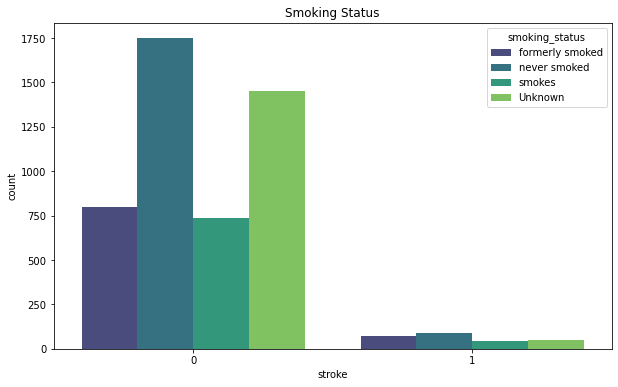

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(x='stroke',data=d,palette='viridis',hue='smoking_status')
plt.title('Smoking Status')

Text(0.5, 1.0, 'Heart Disease Status')

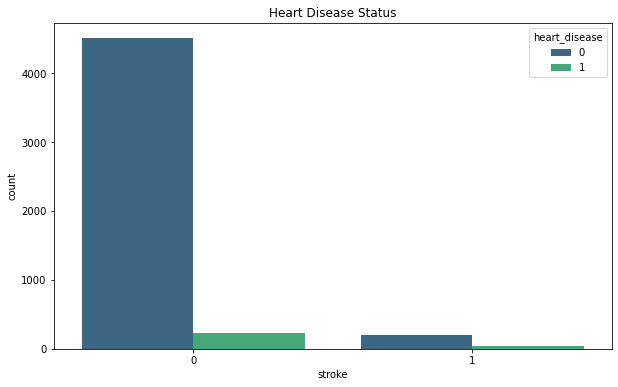

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(x='stroke',data=d,palette='viridis',hue='heart_disease')
plt.title('Heart Disease Status')

Text(0.5, 1.0, 'Hypertension Status')

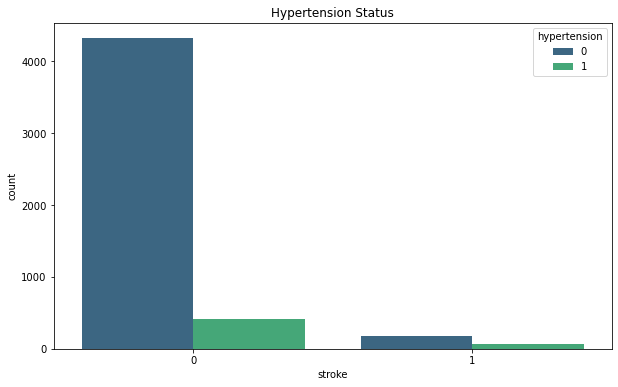

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(x='stroke',data=d,palette='viridis',hue='hypertension')
plt.title('Hypertension Status')

Text(0.5, 1.0, 'Gender Status')

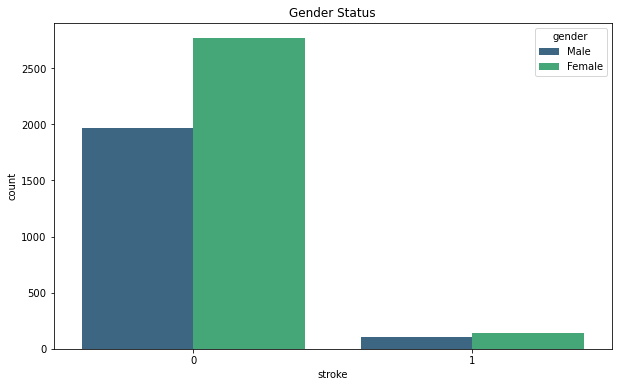

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='stroke',data=d,palette='viridis',hue='gender')
plt.title('Gender Status')

<Figure size 720x432 with 0 Axes>

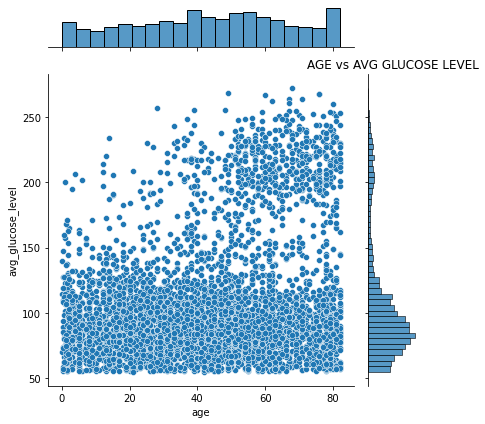

In [72]:
plt.figure(figsize=(10,6))
sns.jointplot(x='age',y='avg_glucose_level',data=d,palette='viridis')
plt.title('AGE vs AVG GLUCOSE LEVEL')
plt.tight_layout()

<Figure size 720x432 with 0 Axes>

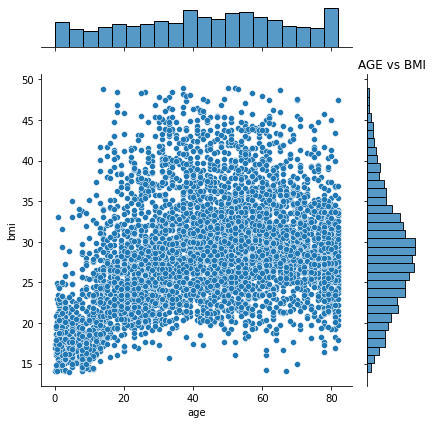

In [74]:
plt.figure(figsize=(10,6))
sns.jointplot(x='age',y='bmi',data=d,palette='viridis')
plt.title('AGE vs BMI')
plt.tight_layout()

In [69]:
#Checking Missing Values

<AxesSubplot:>

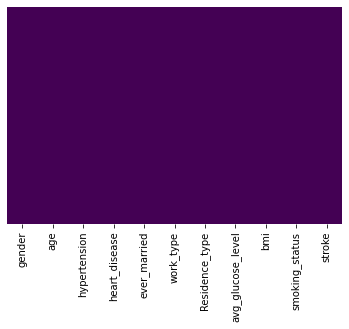

In [68]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
#Preparing the Data

In [80]:
d['gender_status']=pd.get_dummies(d['gender'],drop_first=True)

In [81]:
d.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1


In [84]:
work = pd.get_dummies(d['work_type'],drop_first=True)

In [88]:
d=pd.concat([d,work],axis=1)

In [89]:
d.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_status,Private,Self-employed,children
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,0,0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,0,0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,0,0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,1,0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,0,0


In [92]:
smoke = pd.get_dummies(d['smoking_status'],drop_first=True)

In [93]:
d = pd.concat([d,smoke],axis=1)

In [94]:
d.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_status,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,0,0,1,0,0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,0,0,0,1,0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,0,0,0,0,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,1,0,0,1,0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,0,0,1,0,0


In [97]:
d['married']=pd.get_dummies(d['ever_married'],drop_first=True)

In [98]:
d.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_status,Private,Self-employed,children,formerly smoked,never smoked,smokes,married
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,0,0,1,0,0,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,0,0,0,1,0,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,0,0,0,0,1,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,1,0,0,1,0,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,0,0,1,0,0,1


In [ ]:
#choosing Features and Classification label

In [100]:
x = d.drop(['stroke','gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
y = d['stroke']

In [101]:
#Splitting the data into train and test datasets

In [102]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=101)

In [105]:
#Training the Data

In [104]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [106]:
#Testing the Model

In [107]:
knn_pred = knn.predict(xtest)

In [108]:
print(metrics.classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1405
           1       0.18      0.16      0.17        90

    accuracy                           0.91      1495
   macro avg       0.56      0.56      0.56      1495
weighted avg       0.90      0.91      0.90      1495



In [110]:
metrics.accuracy_score(ytest,knn_pred)*100

90.63545150501672

In [111]:
#Choosing n_neighbors value

In [112]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    y_pred = knn.predict(xtest)
    error_rate.append(np.mean(y_pred != ytest))

Text(0.5, 1.0, 'K value error rate')

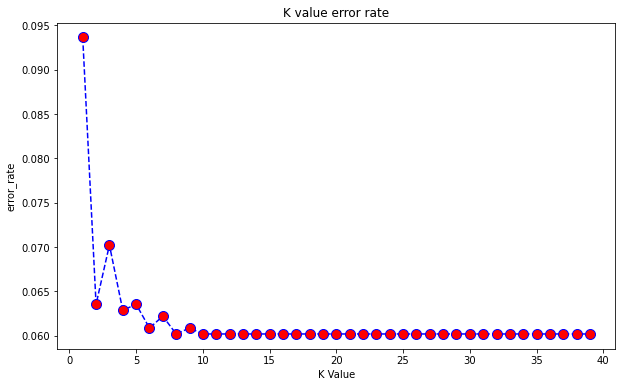

In [113]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,ls='--',color='blue',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K Value')
plt.ylabel('error_rate')
plt.title('K value error rate')

In [114]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
knn_prediction = knn.predict(xtest)

In [115]:
print(metrics.classification_report(ytest,knn_prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1405
           1       0.00      0.00      0.00        90

    accuracy                           0.94      1495
   macro avg       0.47      0.50      0.48      1495
weighted avg       0.88      0.94      0.91      1495



In [117]:
print(metrics.confusion_matrix(ytest,knn_prediction))

[[1402    3]
 [  90    0]]


In [118]:
metrics.accuracy_score(ytest,knn_prediction)*100

93.77926421404682